In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [147]:
df = pd.read_csv('kidney_disease (1).csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [148]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


Categorical Variables



,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [149]:
df['pcv'] = df['pcv'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['pcv'] = df['pcv'].astype(float)

In [150]:
df['wc'] = df['wc'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['wc'] = df['wc'].astype(float)

In [151]:
df['rc'] = df['rc'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['rc'] = df['rc'].astype(float)

In [17]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.0
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.0


Categorical Variables



,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [10]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [152]:
dframe = df.loc[df['classification'] != 'ckd\t']

In [153]:
dframe['classification'].value_counts()

classification
ckd       248
notckd    150
Name: count, dtype: int64

In [154]:
dframe.drop('id', axis = 1, inplace = True)

In [21]:
def cleaner(dataframe):
    for i in dataframe.columns: # ---------------------------------------------- Iterate through the columns of the data
        if ((dataframe[i].isnull().sum() / len(dataframe)) * 100) > 30: # ------ Check if the columns has above 30% of its data
            dataframe.drop(i, axis = 1, inplace = True)# ----------------------- Drop such columns
        elif dataframe[i].dtypes == 'O': # ------------------------------------- Select all categorical columns
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True) # ------ Replace the missing  with the mode
        else:
            dataframe[i].fillna(dataframe[i].median(), inplace = True) # ------- select all numerical columns and clean missing with the median
    return dataframe

cleaner (df)

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,15.4,44.0,7800.0,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,121.0,18.0,...,11.3,38.0,6000.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,9.6,31.0,7500.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,11.2,32.0,6700.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,11.6,35.0,7300.0,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,...,15.7,47.0,6700.0,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,...,16.5,54.0,7800.0,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,...,15.8,49.0,6600.0,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,...,14.2,51.0,7200.0,no,no,no,good,no,no,notckd


In [22]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [24]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in cat.columns:
    if i in df.columns:
        df[i] = encoder.fit_transform(df[i])

df

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,...,15.4,44.0,7800.0,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,0,0,121.0,18.0,...,11.3,38.0,6000.0,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,...,9.6,31.0,7500.0,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,...,11.2,32.0,6700.0,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,...,11.6,35.0,7300.0,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,0,0,140.0,49.0,...,15.7,47.0,6700.0,0,3,1,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,0,0,75.0,31.0,...,16.5,54.0,7800.0,0,3,1,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,0,0,100.0,26.0,...,15.8,49.0,6600.0,0,3,1,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,0,0,114.0,50.0,...,14.2,51.0,7200.0,0,3,1,0,0,0,1


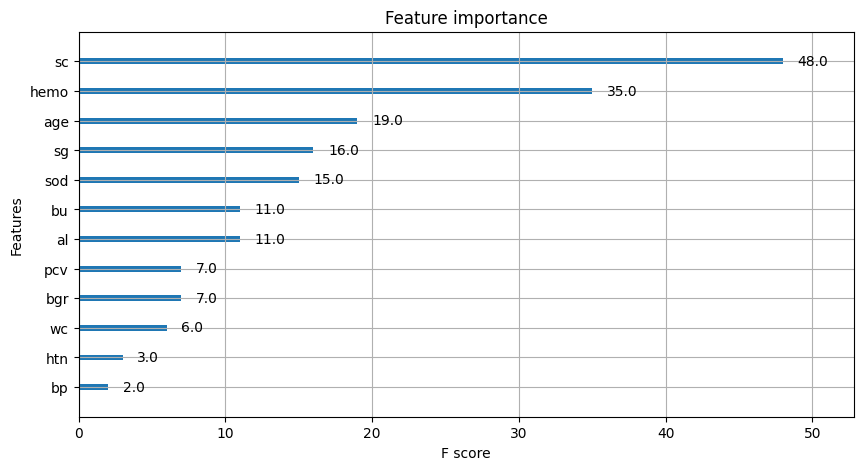

In [25]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('classification', axis = 1)
y = df.classification

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [26]:
sel_columns = ['sc', 'hemo', 'age', 'sg',
 'sod', 'bu', 'al', 'classification']

sel_data = df[sel_columns]
sel_data

,sc,hemo,age,sg,sod,bu,al,classification
0,1.2,15.4,48.0,1.020,138.0,36.0,1.0,0
1,0.8,11.3,7.0,1.020,138.0,18.0,4.0,0
2,1.8,9.6,62.0,1.010,138.0,53.0,2.0,0
3,3.8,11.2,48.0,1.005,111.0,56.0,4.0,0
4,1.4,11.6,51.0,1.010,138.0,26.0,2.0,0
...,...,...,...,...,...,...,...,...
395,0.5,15.7,55.0,1.020,150.0,49.0,0.0,1
396,1.2,16.5,42.0,1.025,141.0,31.0,0.0,1
397,0.6,15.8,12.0,1.020,137.0,26.0,0.0,1
398,1.0,14.2,17.0,1.025,135.0,50.0,0.0,1


<Axes: xlabel='classification', ylabel='count'>

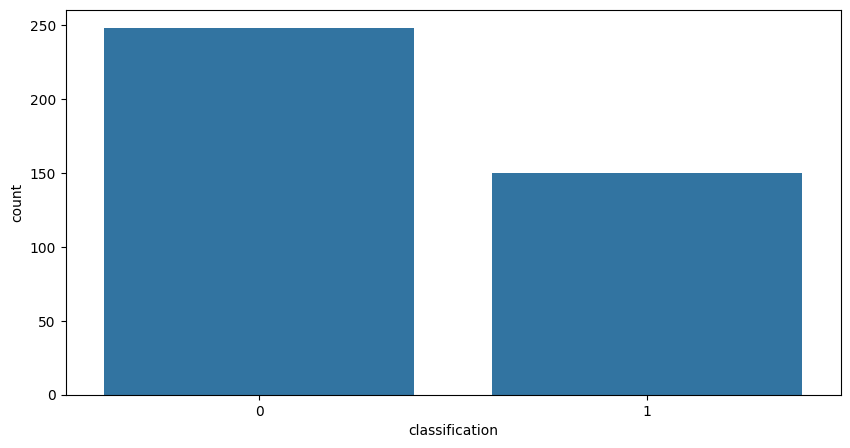

In [27]:
sns.countplot(x = df.classification)

In [28]:
x = sel_data.drop('classification', axis = 1)
y = sel_data.classification

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [30]:
# getting the best random to use for the smote
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

scores = [] # -------------------------------------------------------------- Create a list to store the scores of each loop
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state= i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    # Creating a model
    model= LogisticRegression()
    model.fit(X_resampled, y_resampled)

    scores.append(accuracy_score(model.predict(X_resampled), y_resampled))

In [31]:
print(f'Best Random State To Use: {np.array(scores).argmax()}')

Best Random State To Use: 25


<Axes: xlabel='classification', ylabel='count'>

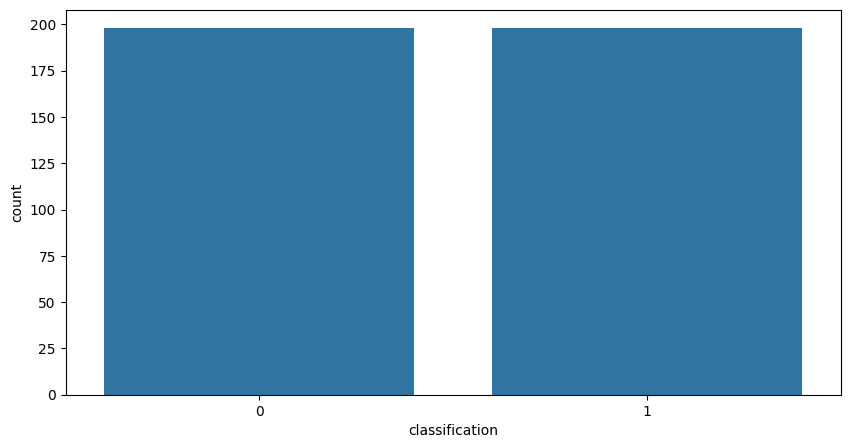

In [32]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['classification'])

In [33]:
def modeller(x_train, y_train, x_test, y_test, show_train_score = None):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # list of algorithms to be used
    algorithms = [RandomForestClassifier(), XGBClassifier(), DecisionTreeClassifier(), SVC(kernel = 'poly'), LogisticRegression()]

    # keep the training and test scores
    scores = []
    train_validator = []

    for i in algorithms:
        model_name = i
        model_name.fit(x_train, y_train)
        model_validate = model_name.predict(x_train)
        train_validator.append(accuracy_score(model_validate, y_train))

        test_perf = model_name.predict(x_test)
        scores.append(accuracy_score(test_perf, y_test))

    # create a table for each algorithms and scores
    compare_table = pd.DataFrame()
    compare_table['Algorithm'] = pd.Series(algorithms)
    compare_table['Accuracy'] = pd.Series(scores)

    if show_train_score == 'show_train':
        compare_table['Training Accuracy'] = pd.Series(train_validator)
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]
    else:
        return compare_table.sort_values(by = 'Accuracy', ascending = False), compare_table['Algorithm'][0], compare_table['Algorithm'][1]


table, model1, model2 = modeller(X_resampled, y_resampled, xtest, ytest, show_train_score = 'show_train')
table

,Algorithm,Accuracy,Training Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0000,1.000000
1,"XGBClassifier(base_score=None, booster=None, c...",1.0000,1.000000
2,DecisionTreeClassifier(),0.9625,1.000000
4,LogisticRegression(),0.9500,0.969697
3,SVC(kernel='poly'),0.8125,0.853535


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       198

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



<Axes: >

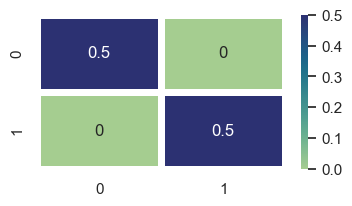

In [35]:
from sklearn.ensemble import RandomForestClassifier
rand_model = RandomForestClassifier()

rand_model.fit(X_resampled, y_resampled)

cross_validation = rand_model.predict(X_resampled)
print(classification_report(cross_validation, y_resampled))

revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

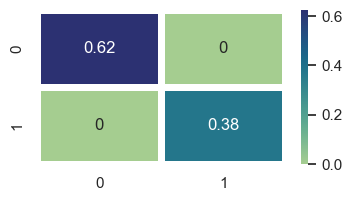

In [36]:
test_prediction = rand_model.predict(xtest)
print(classification_report(test_prediction, ytest))

revealer = confusion_matrix(test_prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [38]:
# Export the model
import pickle, joblib

pickle.dump(rand_model, open('kidney_model.pkl', "wb"))

In [39]:
imported_model = joblib.load('kidney_model.pkl')
imported_model

RandomForestClassifier()

In [40]:
pd.concat([xtest, ytest], axis = 1)

,sc,hemo,age,sg,sod,bu,al,classification
212,11.9,10.9,40.0,1.015,132.0,150.0,3.0,0
106,6.1,6.0,50.0,1.020,127.0,118.0,0.0,0
163,2.0,9.0,46.0,1.010,140.0,40.0,0.0,0
23,1.3,12.7,21.0,1.010,138.0,42.0,0.0,0
245,5.3,6.3,48.0,1.020,135.0,79.0,0.0,0
...,...,...,...,...,...,...,...,...
51,1.6,10.3,54.0,1.015,136.0,66.0,3.0,0
82,1.9,12.7,38.0,1.020,140.0,77.0,0.0,0
242,6.3,9.4,69.0,1.010,120.0,96.0,4.0,0
219,2.5,9.8,68.0,1.010,138.0,57.0,0.0,0


In [41]:
imported_model.predict([[6.3,	9.4,	69.0,	1.010,	120.0,	96.0,	4.0		]])

array([0])

CORRECTION

In [155]:
df = pd.read_csv('kidney_disease (1).csv')
pd.set_option('display.max_columns', 500)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [156]:
df.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
df.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [157]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

display(num.head())
display(cat.head())

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


,red blood cells,pus cell,pus cell clumps,bacteria,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [158]:
def converter(df):
    df= pd.to_numeric(df, errors = 'coerce')
    return df

data = df.copy()
converter(data['packed cell volume'])
converter(data['white blood cell count'])
converter(data['red blood cell count'])

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: red blood cell count, Length: 400, dtype: float64

DATA PREPROCESSING


In [159]:
data = df.copy()

from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

for i in cat:
    if i in data:
        data[i] = label_encode.fit_transform(data[i])
df

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


FEATURE SELECTION


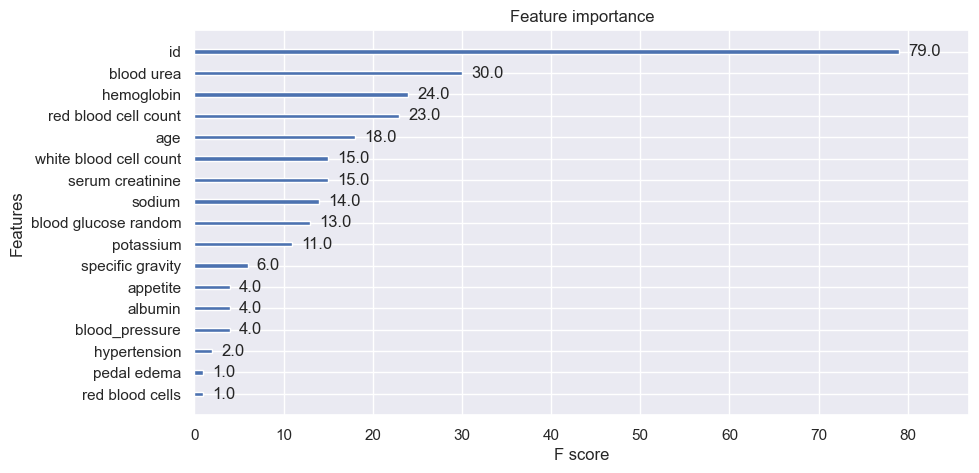

In [160]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = data.drop('classes', axis = 1)
y = data.classes

model.fit(x, y)

# plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [161]:
sel_cols = ['blood urea', 'hemoglobin', 'red blood cell count', 'age', 'white blood cell count', 'serum creatinine', 'sodium', 'classes']
sel_data = data[sel_cols]
sel_data

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium,classes
0,36.0,15.4,34,48.0,72,1.2,NaN,0
1,18.0,11.3,49,7.0,56,0.8,NaN,0
2,53.0,9.6,49,62.0,70,1.8,NaN,0
3,56.0,11.2,19,48.0,62,3.8,111.0,0
4,26.0,11.6,27,51.0,68,1.4,NaN,0
...,...,...,...,...,...,...,...,...
395,49.0,15.7,30,55.0,62,0.5,150.0,2
396,31.0,16.5,44,42.0,72,1.2,141.0,2
397,26.0,15.8,36,12.0,61,0.6,137.0,2
398,50.0,14.2,41,17.0,67,1.0,135.0,2


In [162]:
sel_data.dropna(inplace = True)
sel_data.shape

(271, 8)

<Axes: xlabel='classes', ylabel='count'>

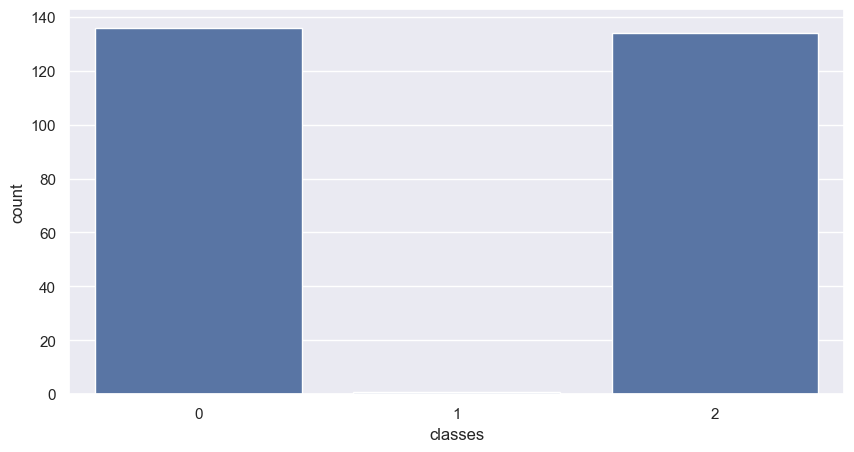

In [163]:
sns.set(style = 'darkgrid')
sns.countplot(x = sel_data.classes)

<Axes: xlabel='classes', ylabel='count'>

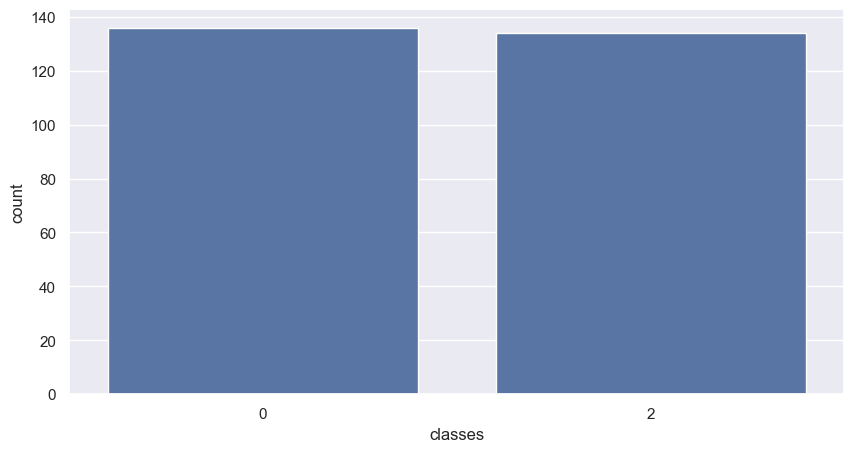

In [164]:
sel_data = sel_data.loc[sel_data['classes'] != 1]
sns.countplot(x = sel_data.classes)

In [165]:
# Split Into Train and Test
x = sel_data.drop('classes', axis = 1)
y = sel_data.classes

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier()

rf_model.fit(xtrain, ytrain)
cross_val = print(classification_report(rf_model.predict(xtrain), ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       107

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [167]:
print(classification_report(rf_model.predict(xtest), ytest))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           2       1.00      0.96      0.98        28

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [168]:
# serialise transformers and model
import joblib

joblib.dump(label_encode, 'encoder.pkl')
joblib.dump(rf_model, 'kidney_model.pkl')

['kidney_model.pkl']

<hr>

<h3>MODEL DEPLOYMENT DEMO

In [169]:
# new patients data to predict the classes of their kidney disease
new_patients = data.sample(10)
new_patients = new_patients[sel_cols].drop('classes', axis = 1)
new_patients

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium
282,44.0,14.6,29,20.0,51,1.0,135.0
163,40.0,9.0,12,46.0,75,2.0,140.0
134,NaN,10.8,18,47.0,3,16.9,138.0
156,76.0,NaN,49,66.0,92,3.3,NaN
188,66.0,12.2,49,8.0,92,2.5,142.0
151,46.0,9.6,49,76.0,92,1.7,141.0
32,39.0,11.3,21,61.0,88,1.5,133.0
341,37.0,13.4,28,63.0,68,0.9,150.0
20,148.0,7.7,12,61.0,84,3.9,135.0
248,55.0,12.6,22,59.0,3,1.7,138.0


In [170]:
new_patients.dropna(inplace = True)
new_patients

,blood urea,hemoglobin,red blood cell count,age,white blood cell count,serum creatinine,sodium
282,44.0,14.6,29,20.0,51,1.0,135.0
163,40.0,9.0,12,46.0,75,2.0,140.0
188,66.0,12.2,49,8.0,92,2.5,142.0
151,46.0,9.6,49,76.0,92,1.7,141.0
32,39.0,11.3,21,61.0,88,1.5,133.0
341,37.0,13.4,28,63.0,68,0.9,150.0
20,148.0,7.7,12,61.0,84,3.9,135.0
248,55.0,12.6,22,59.0,3,1.7,138.0


In [171]:
imported_model.predict(new_patients)

array([2, 0, 0, 0, 0, 2, 0, 0])

In [175]:
df.iloc[341]['classes']

'notckd'